## Partitioning datasets

#### Import a dataset

In [1]:
import pandas as pd
import numpy as np

# We will use the Wine, an open-source dataset available from the UCI ML library.
link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df_wine = pd.read_csv(link, header=None)

wine_columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonvlavanoid phenols', 'Proanthocyanins', 
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.columns = wine_columns

In [2]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonvlavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


You can also preview a dataframe interactively using qgrid, https://github.com/jaysonfrancis/qgrid

In [4]:
import qgrid
qgrid.show_grid(df_wine)

Partition the dataset into separate **test** and **training** sets conveniently using the **train_test_split** function from sklearn

In [5]:
from sklearn.cross_validation import train_test_split

# Assign columns [1-13] to X, and class [0] labels to y
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Randomly distribute 30/70 split. 30% to test, 70% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature scaling

- Critical step in the preprocessing phase.
- Most alogirthms perform better with features that are scaled/nomilized. (With the exception of decision trees & random forests)

- **Normalization** ; Rescaling of the freatures to range of [0, 1], min-max scaling.

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# Fit the training data
X_train_norm = mms.fit_transform(X_train)

# Use the same parameters to transofrm the test set
X_test_norm = mms.transform(X_test)

- **Standardization** ; Subtract the sample mean of a particular feature, divide by corresponding standard deviation.

In [7]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

# Fit the training data
X_train_std = stdsc.fit_transform(X_train)

# Use the same parameters to transofrm the test set
X_test_std = stdsc.transform(X_test)

## L1 Regularization

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)

lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Training accuracy
lr.score(X_train_std, y_train)

0.9838709677419355

In [10]:
# Testing accuracy
lr.score(X_test_std, y_test)

0.98148148148148151

In [11]:
# Intercepts
lr.intercept_

array([-0.38381214, -0.15809717, -0.70049163])

In [12]:
# Coefficients - 3 weight  coefficient vectors, 13 weights in each.
lr.coef_

array([[ 0.28015795,  0.        ,  0.        , -0.0279584 ,  0.        ,
         0.        ,  0.71011073,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23626069],
       [-0.64391053, -0.06882766, -0.05719239,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92692272,
         0.06004466,  0.        , -0.37103811],
       [ 0.        ,  0.06157678,  0.        ,  0.        ,  0.        ,
         0.        , -0.63529637,  0.        ,  0.        ,  0.49780919,
        -0.35839887, -0.57182911,  0.        ]])

#### Regularization path visualization

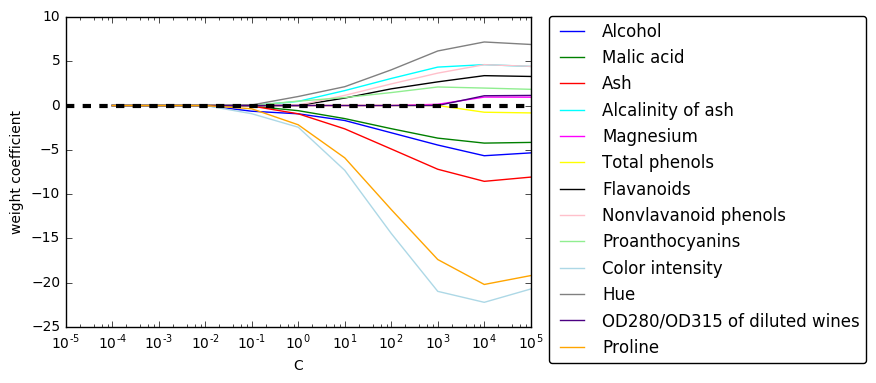

In [13]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
          'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

plt.show()